In [25]:
# Import the custom modules
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Get the absolute path of the scripts directory
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts'))
sys.path.append(scripts_path)

from data_loader import load_train_data,load_test_data
from data_cleaning import handle_missing_data, remove_outliers
from analysis import correlation_analysis, sales_promo_analysis
from visualization import plot_distribution, plot_boxplot, plot_correlation_heatmap



In [2]:
# Load the data
train_data = load_train_data()
test_data = load_test_data()

c:\Users\HP\week 4\scripts\data_loader.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv(r'C:\Users\HP\week 4\data\train.csv')


In [3]:
# Display the first few rows of the datasets to verify
print(train_data.head())


   Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  2015-07-31   5263        555     1      1            0   
1      2          5  2015-07-31   6064        625     1      1            0   
2      3          5  2015-07-31   8314        821     1      1            0   
3      4          5  2015-07-31  13995       1498     1      1            0   
4      5          5  2015-07-31   4822        559     1      1            0   

   SchoolHoliday  
0              1  
1              1  
2              1  
3              1  
4              1  


In [4]:
# Display the first few rows of the datasets to verify
print(test_data.head())

   Id  Store  DayOfWeek        Date  Open  Promo StateHoliday  SchoolHoliday
0   1      1          4  2015-09-17   1.0      1            0              0
1   2      3          4  2015-09-17   1.0      1            0              0
2   3      7          4  2015-09-17   1.0      1            0              0
3   4      8          4  2015-09-17   1.0      1            0              0
4   5      9          4  2015-09-17   1.0      1            0              0


In [10]:
# Check for missing values in both datasets
print("Missing values in training data:\n", train_data.isnull().sum())
print("Missing values in test data:\n", test_data.isnull().sum())



Missing values in training data:
 Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
Missing values in test data:
 Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64


In [5]:
# Clean the data
train_data = handle_missing_data(train_data)
train_data = remove_outliers(train_data)


Column 'numeric_column' does not exist in the DataFrame


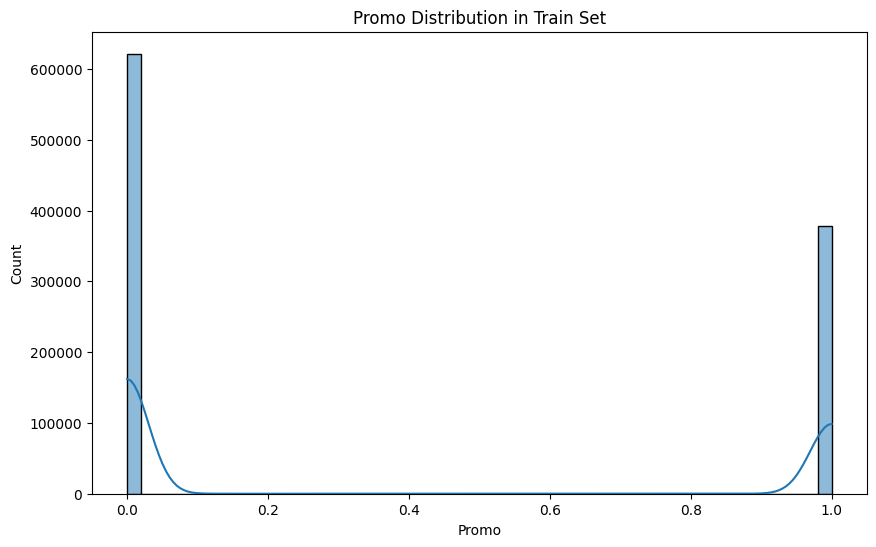

In [6]:
# EDA: Distribution of promos
plot_distribution(train_data, 'Promo', 'Promo Distribution in Train Set')


              Sales  Customers
Sales      1.000000   0.908853
Customers  0.908853   1.000000


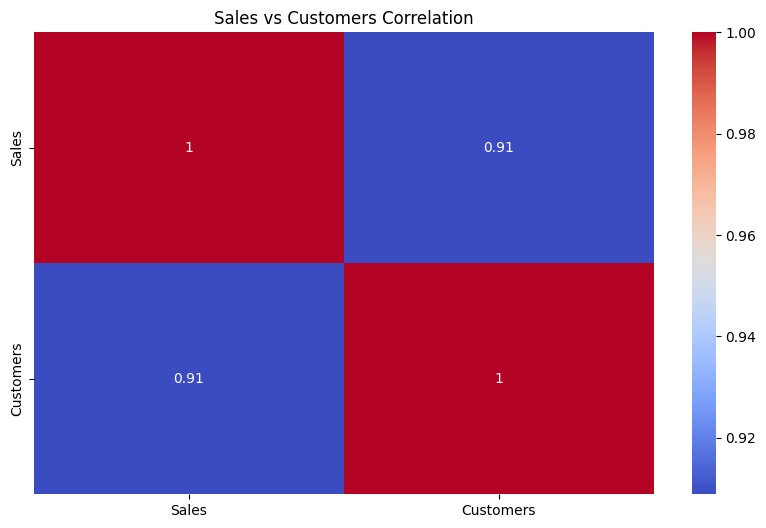

In [7]:
# EDA: Correlation between sales and customers
correlation_matrix = correlation_analysis(train_data, ['Sales', 'Customers'])
print(correlation_matrix)
plot_correlation_heatmap(train_data, ['Sales', 'Customers'], 'Sales vs Customers Correlation')


In [8]:
# Analyze promo's effect on sales
promo_sales_summary = sales_promo_analysis(train_data)
print(promo_sales_summary)

          count         mean          std  min     25%     50%     75%  \
Promo                                                                    
0      621651.0  4266.914106  3182.556548  0.0     0.0  4583.0  6291.0   
1      378181.0  7717.470219  2936.565678  0.0  5879.0  7471.0  9406.0   

           max  
Promo           
0      17323.0  
1      17321.0  


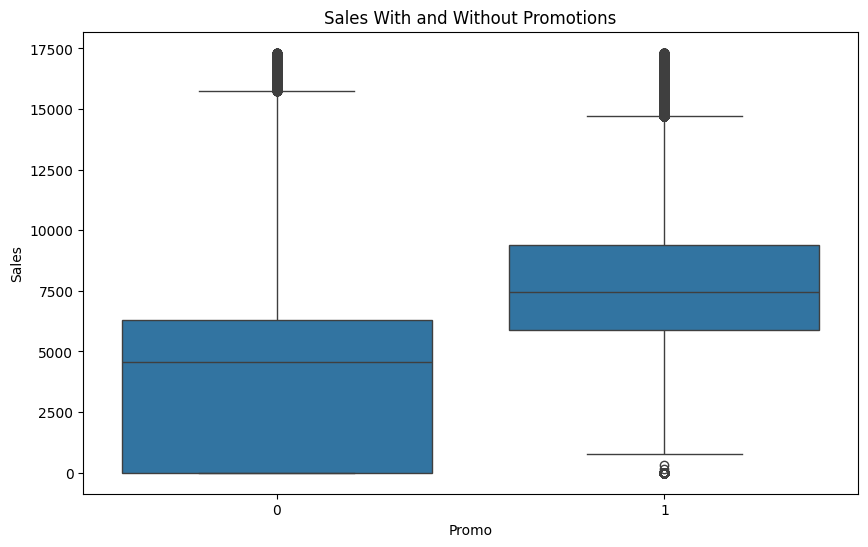

In [9]:
# EDA: Boxplot for sales with and without promos
plot_boxplot(train_data, 'Promo', 'Sales', 'Sales With and Without Promotions')

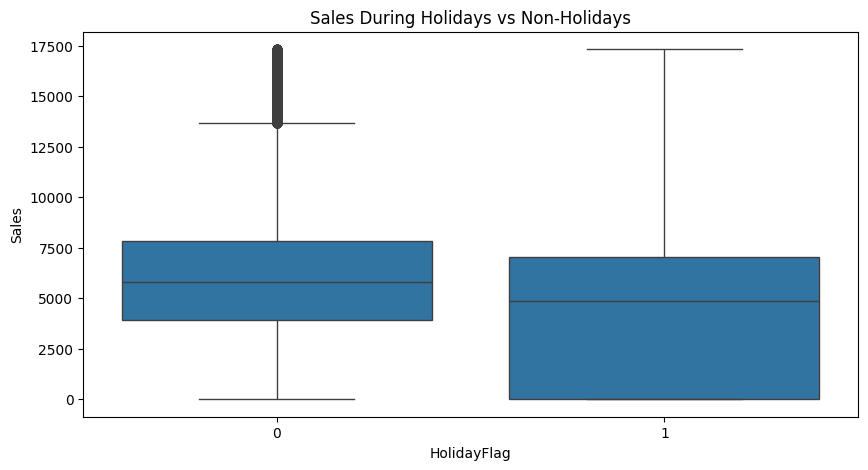

In [26]:
# Create a holiday flag and analyze sales around holidays
train_data['HolidayFlag'] = train_data['StateHoliday'].apply(lambda x: 1 if x != '0' else 0)
# Compare sales before, during, and after holidays
plt.figure(figsize=(10, 5))
sns.boxplot(x='HolidayFlag', y='Sales', data=train_data)
plt.title('Sales During Holidays vs Non-Holidays')
plt.show()

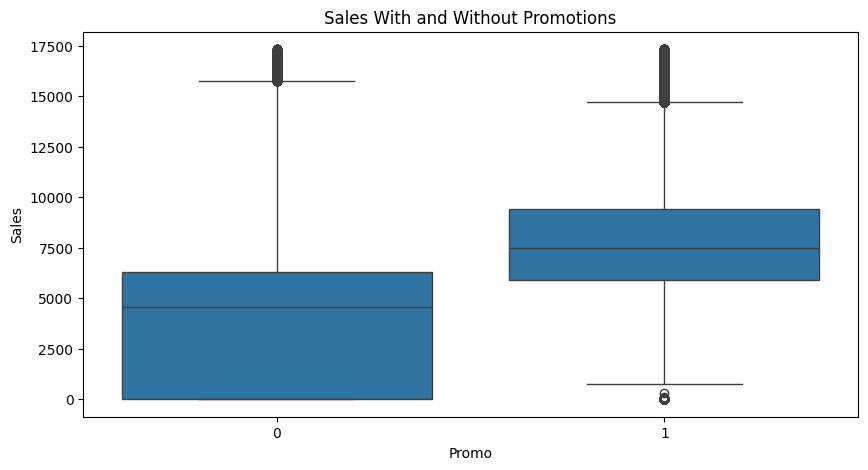

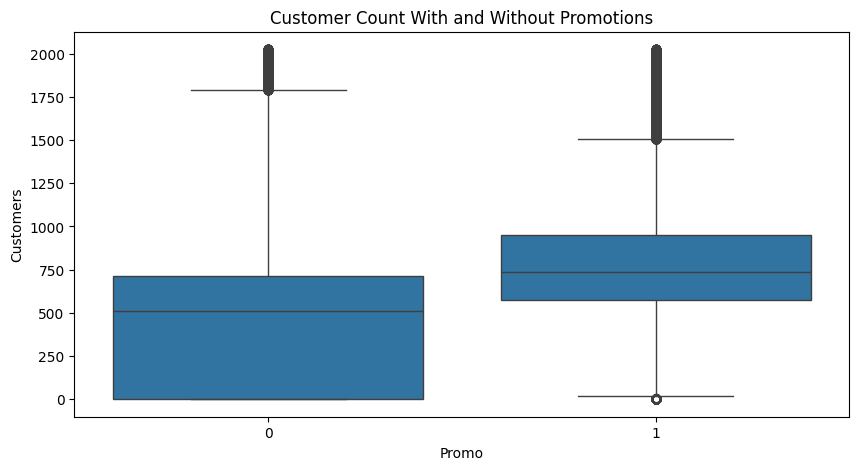

In [27]:
# Analyze sales with and without promotions
plt.figure(figsize=(10,5))
sns.boxplot(x='Promo', y='Sales', data=train_data)
plt.title('Sales With and Without Promotions')
plt.show()

# Check if promos attract more customers
plt.figure(figsize=(10,5))
sns.boxplot(x='Promo', y='Customers', data=train_data)
plt.title('Customer Count With and Without Promotions')
plt.show()


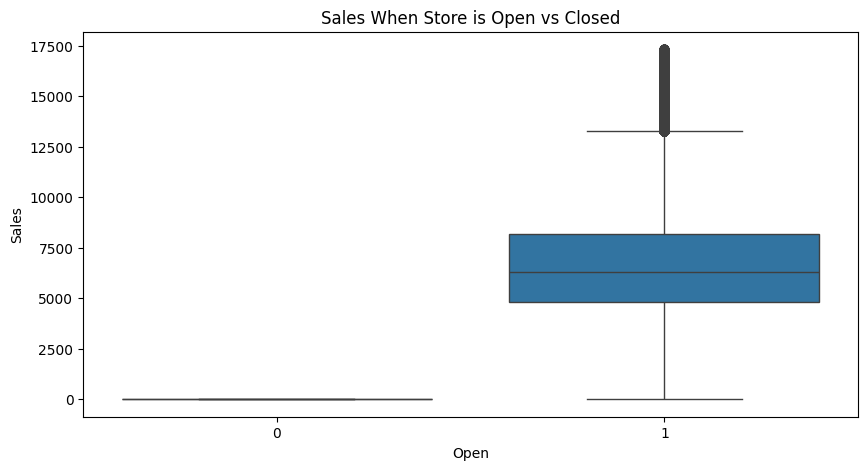

In [28]:
# Analyze sales trends around store openings
# Assuming 'Open' column indicates store opening status
plt.figure(figsize=(10,5))
sns.boxplot(x='Open', y='Sales', data=train_data)
plt.title('Sales When Store is Open vs Closed')
plt.show()
